# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2



In [ ]:
# TODO: RA & Name
print(f'RA1: 213259 ' + 'Arthur Baia')
print(f'RA2: 200025 ' + 'José Afonso')


RA1: 213259 Arthur Baia
RA2: 200025 José Afonso


## Objective

Explore **linear regression** and **logistic regression** alternatives and come up with the best possible model for the problems, avoiding overfitting. In particular, predict the performance of students from public schools in the state of São Paulo based on socioeconomic data from SARESP (School Performance Assessment System of the State of São Paulo, or Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo) 2021.

### Dataset

These data were aggregated from [Open Data Platform of the Secretary of Education of the State of São Paulo](https://dados.educacao.sp.gov.br/) (*Portal de Dados Abertos da Secretaria da Educação do Estado de São Paulo*). The dataset is based on two data sources: [SARESP questionnaire](https://dados.educacao.sp.gov.br/dataset/question%C3%A1rios-saresp) and [SARESP test](https://dados.educacao.sp.gov.br/dataset/profici%C3%AAncia-do-sistema-de-avalia%C3%A7%C3%A3o-de-rendimento-escolar-do-estado-de-s%C3%A3o-paulo-saresp-por), conducted in 2021 with students from the 5th and 9th year of Primary School and 3rd year of Highschool. The questionnaire comprehends 63 socio-economical questions, and it is available at the [link](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing)), and the test is composed of questions of Portuguese, Mathematics, and Natural Sciences.


**Data Dictionary**:

- **CD_ALUNO**: Student ID;

- **CODESC**: School ID;

- **NOMESC**: School Name;

- **RegiaoMetropolitana**: Metropolitan region;

- **DE**: Name of the Education Board;

- **CODMUN**: City ID;

- **MUN**: City name;

- **SERIE_ANO**: Scholar year;

- **TURMA**: Class;

- **TP_SEXO**: Sex (Female/Male);

- **DT_NASCIMENTO**: Birth date;

- **PERIODO**: Period of study (morning, afternoon, evening);

- **Tem_Nec**: Whether student has any special needs (1 = yes, 0 = no);

- **NEC_ESP_1** - **NEC_ESP_5**: Student disabilities;

- **Tipo_PROVA**: Exam type (A = Enlarged, B = Braile, C = Common);

- **QN**: Student answer to the question N (N= 1, ... , 63), see  questions in [questionnaire](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing));

- **porc_ACERT_lp**: Percentage of correct answers in the Portuguese test;

- **porc_ACERT_MAT**: Percentage of correct answers in the Mathematics test;

- **porc_ACERT_CIE**: Percentage of correct answers in the Natural Sciences test;

- **nivel_profic_lp**: Proficiency level in the Portuguese test;

- **nivel_profic_mat**: Proficiency level in the Mathematics test;

- **nivel_profic_cie**:  Proficiency level in the Natural Sciences test.


---



You must respect the following training/test split:
- SARESP_train.csv
- SARESP_test.csv

## Linear Regression

This part of the assignment aims to predict students' performance on Portuguese, Mathematics, and Natural Sciences tests (target values: `porc_ACERT_lp`, `porc_ACERT_MAT`, and  `porc_ACERT_CIE`) based on their socioeconomic data. Then, at this point, you have to **drop the columns `nivel_profic_lp`, `nivel_profic_mat`** and **`nivel_profic_cie`**.

### Activities

1. (3.5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Before we start an ML project, we always conduct a brief exploratory analysis :D 

Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables? Are there any features with low correlation with the target variables? What happens if you drop them?




---
## Step 1: Load data and check it

In [180]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
%cd drive
%cd MyDrive
%cd Unicamp/MC886/Trab01
%ls
df = pd.read_csv("SARESP_train.csv")
df_teste = pd.read_csv("SARESP_test.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/Unicamp/MC886/Trab01
[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/Unicamp/MC886/Trab01
[Errno 2] No such file or directory: 'Unicamp/MC886/Trab01'
/content/drive/MyDrive/Unicamp/MC886/Trab01
Copy_of_2022s2_mc886mo444_assignment_02.ipynb  SARESP_test.csv
output.txt                                     SARESP_train.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [181]:
df

,CD_ALUNO,NOMESC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,NEC_ESP_4,NEC_ESP_5,Tipo_PROVA,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,26270013,JULIO FORTES,B,E,E,E,E,E,E,E,...,NaN,NaN,C,0,41.7,20.8,20.8,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
1,30756614,MESSIAS FREIRE PROFESSOR,B,D,E,C,E,E,E,E,...,NaN,NaN,C,0,83.3,100.0,66.7,Adequado,Avançado,Adequado
2,26014872,JOSE CONTI,B,E,B,D,E,B,D,C,...,NaN,NaN,C,0,58.3,37.5,54.2,Básico,Básico,Básico
3,25739025,NAPOLEAO DE CARVALHO FREIRE PROFESSOR,B,D,E,D,C,E,D,D,...,NaN,NaN,C,0,29.2,29.2,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
4,27363009,RESIDENCIAL BORDON,B,D,E,E,E,E,E,C,...,NaN,NaN,C,0,79.2,41.7,50.0,Adequado,Abaixo do Básico,Básico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120591,28799794,ENNIO CHIESA PROFESSOR,A,E,E,E,E,E,E,E,...,NaN,NaN,C,0,79.2,66.7,83.3,Adequado,Básico,Adequado
120592,27825068,HELIO HELENE,B,D,D,D,D,D,D,D,...,NaN,NaN,C,0,37.5,25.0,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
120593,23873470,ALBERTO SANTOS DUMONT,A,E,E,E,E,E,D,D,...,NaN,NaN,C,0,50.0,37.5,41.7,Básico,Abaixo do Básico,Abaixo do Básico
120594,31376275,FRANCISCO BONFIM,B,E,C,C,D,B,B,A,...,NaN,NaN,C,1,45.8,70.8,54.2,Abaixo do Básico,Básico,Abaixo do Básico


In [182]:
df.describe()


,CD_ALUNO,CODMUN,CODESC,NEC_ESP_5,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE
count,1.205960e+05,120596.000000,120596.000000,0.0,120596.000000,120596.000000,120596.000000,120596.000000
mean,2.734087e+07,364.349075,279415.870510,NaN,0.019818,60.151213,52.225829,56.928877
std,2.946464e+06,220.098318,394245.824543,NaN,0.139376,21.730825,21.262466,18.441383
min,1.739548e+07,100.000000,24.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,2.529711e+07,100.000000,15568.000000,NaN,0.000000,41.700000,37.500000,45.800000
50%,2.712102e+07,336.000000,35178.000000,NaN,0.000000,62.500000,50.000000,58.300000
75%,2.910558e+07,582.000000,901573.000000,NaN,0.000000,79.200000,66.700000,70.800000
max,3.796186e+07,793.000000,926103.000000,NaN,1.000000,100.000000,100.000000,100.000000


In [183]:
df.columns


Index(['CD_ALUNO', 'NOMESC', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'RegiaoMetropolitana', 'DE',
       'CODMUN', 'MUN', 'CODESC', 'SERIE_ANO', 'TURMA', 'TP_SEXO',
       'DT_NASCIMENTO', 'PERIODO', 'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3',
       'NEC_ESP_4', 'NEC_ESP_5', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie'],
      dtype='object')

---
## Step 2: Check NaNs in the dataframe

In [184]:
df.isna().sum(axis=0).sort_values(ascending=False)

NEC_ESP_5           120596
NEC_ESP_4           120595
NEC_ESP_3           120520
NEC_ESP_2           120489
NEC_ESP_1           118206
                     ...  
Q26                      0
Q25                      0
Q24                      0
Q23                      0
nivel_profic_cie         0
Length: 88, dtype: int64

Since there are a lot of NaN's in the NEC_ESP columns, they will be dropped

In [185]:
def drop_nec_columns(df):
    for i in range(1, 6):
        df.drop(columns=[f'NEC_ESP_{i}'], inplace=True)
drop_nec_columns(df)
drop_nec_columns(df_teste)
df.columns

Index(['CD_ALUNO', 'NOMESC', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'RegiaoMetropolitana', 'DE',
       'CODMUN', 'MUN', 'CODESC', 'SERIE_ANO', 'TURMA', 'TP_SEXO',
       'DT_NASCIMENTO', 'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie'],
      dtype='object')

---
## Step 3: Transform data --> Categorical columns into numeric



Based on the questions {Q0, .., Q63} and their meaning and possible values, it's needed to transform them into numerical data

In [186]:

def question_map(df):

    ordinal_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
    inversed_ordinal_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
    dont_know_ordinal_map = {'A': 1, 'B': 2, 'C': 3, 'D': 1, 'E': 2}
    inversed_dont_know_ordinal_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 2} #applied penalty for don't know anwser
    home_ordinal_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
    miss_someone_map = {'A': 1, 'B': 1, 'C': 1, 'D': 0}
    someone_helped_map = {'A': 2, 'B': 1, 'C': 1, 'D': 0}

    for q in range(1, 64):
        if (q <= 8 or (q > 26 and q <= 33) or (q > 33 and q <= 41) or (q > 56 and q <= 58) or q == 60): #ordinal map
            df.replace({f'Q{q}': ordinal_map}, inplace=True)
        elif ((q > 8 and q <= 26) or q == 59):
            df.replace({f'Q{q}': inversed_ordinal_map}, inplace=True) 
        elif (q == 42):
            df.replace({f'Q{q}': inversed_dont_know_ordinal_map}, inplace=True)
        elif (q > 42 and q <= 49):
            df.replace({f'Q{q}': dont_know_ordinal_map}, inplace=True)
        elif (q > 49 and q <= 56):
            df.replace({f'Q{q}': home_ordinal_map}, inplace=True)
        elif (q == 61):
            df.replace({f'Q{q}': miss_someone_map}, inplace=True)
        elif (q == 62):
            df.replace({f'Q{q}': someone_helped_map}, inplace=True)
        else: # 63 question
            df = pd.concat([df, pd.get_dummies(df['Q63'], prefix='Q63')], axis=1)
            df.drop(columns=[ 'Q63'], inplace=True)
    
    return df

df = question_map(df)
df_teste = question_map(df_teste)
df_teste.columns



Index(['CD_ALUNO', 'NOMESC', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'RegiaoMetropolitana', 'DE', 'CODMUN',
       'MUN', 'CODESC', 'SERIE_ANO', 'TURMA', 'TP_SEXO', 'DT_NASCIMENTO',
       'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'nivel_profic_mat', 'nivel_profic_cie', 'Q63_A',
       'Q63_B', 'Q63_C', 'Q63_D'],
      dtype='object')


Considering there are many columns related to geographical columns, { 'RegiaoMetropolitana', 'DE', 'CODMUN', 'MUN', 'CODESC' }, we will select only one column related to this 
matter, because there are no indicator related to social geographical like HDI to correlate to them. Also, if we one hot encode each of these columns there will be a huge increase in dimensionality. So, we will choose the 'Regiao metropolitana' column.

In [187]:
df['RegiaoMetropolitana'].groupby(df['RegiaoMetropolitana']).count()

RegiaoMetropolitana
Interior                                                   39211
Região Metropolitana da Baixada Santista                    7688
Região Metropolitana de Campinas                            3465
Região Metropolitana de Ribeirão Preto                      6712
Região Metropolitana de Sorocaba                            6736
Região Metropolitana de São Paulo                          47437
Região Metropolitana do Vale do Paraíba e Litoral Norte     9347
Name: RegiaoMetropolitana, dtype: int64

In [188]:
def select_geo(df):
    df = pd.concat([df, pd.get_dummies(df['RegiaoMetropolitana'], prefix='RegiaoMetropolitana')], axis=1)
    df.drop(columns=['NOMESC', 'MUN', 'CODESC', 'CODMUN', 'RegiaoMetropolitana',  'DE'], inplace=True)
    return df
df = select_geo(df)
df_teste = select_geo(df_teste)

In [189]:
df_teste._get_numeric_data().columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'Q63_A', 'Q63_B', 'Q63_C', 'Q63_D',
       'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba',
       'RegiaoMetropolitana_Região Metropolitana de São Paulo',
       'RegiaoMetropolitana_Região Met

In [190]:
def get_categorical_columns(df):
    cols = df.columns

    num_cols = df._get_numeric_data().columns

    return list(set(cols) - set(num_cols))
set(get_categorical_columns(df)) - set(get_categorical_columns(df_teste))

{'nivel_profic_lp'}

In [191]:
df.columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TURMA', 'TP_SEXO', 'DT_NASCIMENTO',
       'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'nivel_profic_lp', 'nivel_profic_mat',
       'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C', 'Q63_D',
       'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMet

In [192]:
df_teste.columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TURMA', 'TP_SEXO', 'DT_NASCIMENTO',
       'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'nivel_profic_mat', 'nivel_profic_cie', 'Q63_A',
       'Q63_B', 'Q63_C', 'Q63_D', 'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropol

Since birth date is not a numerical category, we turn it into age (idade column)

In [193]:

from datetime import datetime
from datetime import date


def calculate_age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


df['idade'] = df['DT_NASCIMENTO'].apply(calculate_age)
df_teste['idade'] = df_teste['DT_NASCIMENTO'].apply(calculate_age)
df = df.drop(columns=['DT_NASCIMENTO'])
df_teste = df_teste.drop(columns=['DT_NASCIMENTO'])
df['idade']


0         18
1         12
2         15
3         18
4         15
          ..
120591    16
120592    13
120593    19
120594    12
120595    17
Name: idade, Length: 120596, dtype: int64

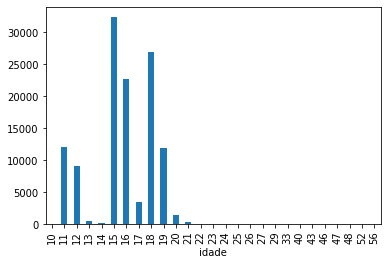

In [194]:
df['idade'].groupby(df['idade']).count().plot(kind='bar')



Transforming sex in 0 (F) or 1 (M):

In [195]:
def sex_mapper(df):
    sex_map = {'F': 0, 'M': 1}
    df.replace({'TP_SEXO': sex_map}, inplace=True)
    return df
df = sex_mapper(df)
df_teste = sex_mapper(df_teste)


Since more years of schooling may mean more knowledge, we will choose to make SERIE_ANO as ordinal as well.

In [196]:
def school_year_mapper(df): 
    school_year_map = {'EM-3ª série': 3, '9º Ano EF': 2, '5º Ano EF': 1}
    df.replace({'SERIE_ANO': school_year_map}, inplace=True)
    return df
df = school_year_mapper(df)
df_teste = school_year_mapper(df_teste)
df['SERIE_ANO']

0         3
1         1
2         2
3         3
4         2
         ..
120591    2
120592    1
120593    3
120594    1
120595    2
Name: SERIE_ANO, Length: 120596, dtype: int64

Since TURMA column isn't relevant in large scale, we choose to drop it.

In [197]:
def drop_turma(df):
    df = df.drop(columns=['TURMA'])
    return df

df = drop_turma(df)
df_teste = drop_turma(df_teste)

In [198]:
set(df['Tipo_PROVA'].unique()) - set(df_teste['Tipo_PROVA'].unique())


{'A'}

Since there is just one value in test and two values in train, we can drop PROVA column

In [199]:
def drop_tipo_prova(df):
    df = df.drop(columns=['Tipo_PROVA'])
    return df
df = drop_tipo_prova(df)
df_teste = drop_tipo_prova(df_teste)

Here, we performed a one hot encoding on the PERIODO column, since the categories aren't ordinal, providing a better resolution of the data.

In [200]:
def one_hot_encoding_(df):
    df = pd.concat([df, pd.get_dummies(df['PERIODO'], prefix='PERIODO')], axis=1)
    df = df.drop(columns=['PERIODO'])
    return df
df = one_hot_encoding_(df)
df_teste = one_hot_encoding_(df_teste)


In [201]:
get_categorical_columns(df)

['nivel_profic_mat', 'nivel_profic_cie', 'nivel_profic_lp']

In [202]:
get_categorical_columns(df_teste)

['nivel_profic_mat', 'nivel_profic_cie']

In [203]:
"""Get unique values of nivel_profic_mat"""
print(df['nivel_profic_mat'].unique())
print(df['nivel_profic_lp'].unique())
print(df['nivel_profic_cie'].unique())


['Abaixo do Básico' 'Avançado' 'Básico' 'Adequado']
['Abaixo do Básico' 'Adequado' 'Básico' 'Avançado']
['Abaixo do Básico' 'Adequado' 'Básico' 'Avançado']


Last, we mapped the remain columns 

In [204]:
def map_categorical_columns_for_log_reg(df):
    map_for_log_reg = { 'Abaixo do Básico': 0, 'Adequado': 2, 'Básico': 1, 'Avançado': 3}
    df.replace({'nivel_profic_mat': map_for_log_reg}, inplace=True)
    df.replace({'nivel_profic_lp': map_for_log_reg}, inplace=True)
    df.replace({'nivel_profic_cie': map_for_log_reg}, inplace=True)
    return df
map_categorical_columns_for_log_reg(df)
map_categorical_columns_for_log_reg(df_teste)
df['nivel_profic_mat']

0         0
1         3
2         1
3         0
4         0
         ..
120591    1
120592    0
120593    0
120594    1
120595    0
Name: nivel_profic_mat, Length: 120596, dtype: int64

In [205]:
get_categorical_columns(df) #no categorical columns left

[]

In [206]:
get_categorical_columns(df_teste)

[]

All the columns were rightly transformed

---
## Step 4: Numerical analysis

Outliers detection

Since the noly original numerical columns were the porc_ACERT, we will only perform outlier detection on these. The method to find the outliers will be though z-score and standard deviation, it's known that 99% of data is located between -3 std to 3 std, with that in mind we will drop all the data beyond this range  

0.00024876446979999335
0.0
0.0


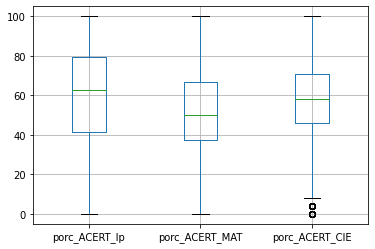

In [207]:
#removing outliers

from scipy import stats

print(len(df[(np.abs(stats.zscore(df['porc_ACERT_CIE'])) > 3)])/len(df.index)) #less than 0.025%
print(len(df[(np.abs(stats.zscore(df['porc_ACERT_MAT'])) > 3)])/len(df.index))
print(len(df[(np.abs(stats.zscore(df['porc_ACERT_lp'])) > 3)])/len(df.index))

df.boxplot(column=['porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE'])  

Since there are less than 0.025% of data that are outliers, there will be no great negative effects in dropping it

In [208]:
df = df[(np.abs(stats.zscore(df['porc_ACERT_CIE'])) < 3)]
type(df)
 

pandas.core.frame.DataFrame

---
## Step 05: Preparing the data.



Preparing df's for each specific target column

In [209]:
df_cie = df 
df_mat = df
df_lp = df
df_cie_test = df_teste
df_mat_test = df_teste
df_lp_test = df_teste


In [210]:
print(set(df_cie_test.columns) - set(df_cie.columns))
print(set(df_mat_test.columns) - set(df_mat.columns))
print(set(df_lp_test.columns) - set(df_lp.columns))
df_mat.columns

set()
set()
set()


Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TP_SEXO', 'Tem_Nec', 'porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C',
       'Q63_D', 'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba',
       'Regi

In [211]:
def tranform_into_lin_reg(df):
    if 'nivel_profic_mat' in df.columns:
        df = df.drop(columns=['nivel_profic_mat'])
    if 'nivel_profic_lp' in df.columns:
        df = df.drop(columns=['nivel_profic_lp'])
    if 'nivel_profic_cie' in df.columns:
        df = df.drop(columns=['nivel_profic_cie'])
    return df


df_cie_lr = tranform_into_lin_reg(df_cie)
print(get_categorical_columns(df_cie_lr))
df_mat_lr = tranform_into_lin_reg(df_mat)
print(get_categorical_columns(df_mat_lr))
df_lp_lr  = tranform_into_lin_reg(df_lp)
print(get_categorical_columns(df_lp_lr))
df_cie_lr_test = tranform_into_lin_reg(df_cie_test)
print(get_categorical_columns(df_cie_lr_test))
df_mat_lr_test = tranform_into_lin_reg(df_mat_test)
print(get_categorical_columns(df_mat_lr_test))
df_lp_lr_test = tranform_into_lin_reg(df_lp_test)
print(get_categorical_columns(df_lp_lr_test))


[]
[]
[]
[]
[]
[]


In [212]:
df_cie_lr.columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TP_SEXO', 'Tem_Nec', 'porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE', 'Q63_A', 'Q63_B', 'Q63_C', 'Q63_D',
       'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba',
       'RegiaoMetropolitana_Região Metropolitana de São Paulo',
       'Regiao

In [213]:
# dropping CD_ALUNO
df_cie_lr = df_cie_lr.drop(columns=['CD_ALUNO'])
df_mat_lr = df_mat_lr.drop(columns=['CD_ALUNO'])
df_lp_lr = df_lp_lr.drop(columns=['CD_ALUNO'])
df_cie_lr_test = df_cie_lr_test.drop(columns=['CD_ALUNO'])
df_mat_lr_test = df_mat_lr_test.drop(columns=['CD_ALUNO'])
df_lp_lr_test = df_lp_lr_test.drop(columns=['CD_ALUNO'])



In [214]:
def normalize_data(df):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    scaler = StandardScaler()
    scaler.fit(df)
    return scaler.transform(df)
df_cie_lr = pd.DataFrame(normalize_data(df_cie_lr), columns=df_cie_lr.columns,index=df_cie_lr.index)
df_mat_lr = pd.DataFrame(normalize_data(df_mat_lr), columns=df_mat_lr.columns,index=df_mat_lr.index)
df_lp_lr = pd.DataFrame(normalize_data(df_lp_lr), columns=df_lp_lr.columns,index=df_lp_lr.index)
df_cie_lr_test = pd.DataFrame(normalize_data(df_cie_lr_test), columns=df_cie_lr_test.columns,index=df_cie_lr_test.index)
df_mat_lr_test = pd.DataFrame(normalize_data(df_mat_lr_test), columns=df_mat_lr_test.columns,index=df_mat_lr_test.index)
df_lp_lr_test = pd.DataFrame(normalize_data(df_lp_lr_test), columns=df_lp_lr_test.columns,index=df_lp_lr_test.index)



In [215]:
df_cie_lr.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,RegiaoMetropolitana_Região Metropolitana da Baixada Santista,RegiaoMetropolitana_Região Metropolitana de Campinas,RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto,RegiaoMetropolitana_Região Metropolitana de Sorocaba,RegiaoMetropolitana_Região Metropolitana de São Paulo,RegiaoMetropolitana_Região Metropolitana do Vale do Paraíba e Litoral Norte,idade,PERIODO_MANHÃ,PERIODO_NOITE,PERIODO_TARDE
count,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,...,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05
mean,1.049024e-16,-4.315142e-16,-1.772732e-16,1.222584e-16,-7.637836e-17,-1.132710e-16,7.331380e-17,5.504428e-17,2.946696e-18,4.537912e-16,...,-5.657657e-18,-2.475225e-18,-6.793608e-17,4.019294e-17,1.379054e-17,2.805255e-17,-3.447634e-16,-1.155105e-17,3.500675e-17,-1.183393e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.267496e+00,-3.377497e+00,-3.135009e+00,-2.476635e+00,-2.898725e+00,-2.301823e+00,-2.741345e+00,-1.998341e+00,-2.144420e+00,-4.759523e+00,...,-2.609769e-01,-1.719659e-01,-2.427251e-01,-2.432228e-01,-8.052361e-01,-2.898989e-01,-2.333231e+00,-1.465640e+00,-3.518703e-01,-5.116614e-01
25%,-1.267496e+00,-1.946253e-01,-2.276916e-01,-7.694097e-01,-9.628269e-01,-6.803548e-01,-9.233868e-01,-4.262935e-01,-7.622820e-01,3.296665e-01,...,-2.609769e-01,-1.719659e-01,-2.427251e-01,-2.432228e-01,-8.052361e-01,-2.898989e-01,-3.058567e-01,-1.465640e+00,-3.518703e-01,-5.116614e-01
50%,3.099038e-01,-1.946253e-01,7.414143e-01,8.420298e-02,5.122103e-03,1.303794e-01,-1.440754e-02,3.597300e-01,6.198564e-01,3.296665e-01,...,-2.609769e-01,-1.719659e-01,-2.427251e-01,-2.432228e-01,-8.052361e-01,-2.898989e-01,9.961824e-02,6.822956e-01,-3.518703e-01,-5.116614e-01
75%,3.099038e-01,8.663319e-01,7.414143e-01,9.378157e-01,9.730711e-01,9.411137e-01,8.945717e-01,1.145754e+00,6.198564e-01,3.296665e-01,...,-2.609769e-01,-1.719659e-01,-2.427251e-01,-2.432228e-01,1.241872e+00,-2.898989e-01,9.105681e-01,6.822956e-01,-3.518703e-01,-5.116614e-01
max,3.464702e+00,8.663319e-01,7.414143e-01,9.378157e-01,9.730711e-01,9.411137e-01,8.945717e-01,1.145754e+00,6.198564e-01,3.296665e-01,...,3.831757e+00,5.815108e+00,4.119886e+00,4.111456e+00,1.241872e+00,3.449478e+00,1.631861e+01,6.822956e-01,2.841956e+00,1.954418e+00


Splitting the data into train and validation sets (80/20)

In [216]:
from sklearn.model_selection import train_test_split
def split_data(df, target, validation_size):
    X = df.drop(columns=[target])
    y = df[target]
    return train_test_split(X, y, test_size=validation_size, random_state=42)

    
X_train_cie, X_val_cie, y_train_cie, y_val_cie = split_data(df_cie_lr, 'porc_ACERT_CIE', 0.2)
X_train_mat, X_val_mat, y_train_mat, y_val_mat = split_data(df_mat_lr, 'porc_ACERT_MAT', 0.2)
X_train_lp, X_val_lp, y_train_lp, y_val_lp = split_data(df_lp_lr, 'porc_ACERT_lp', 0.2)



Dropping target columns

In [217]:
X_test_cie = df_cie_lr_test.drop(columns=['porc_ACERT_CIE'])
X_test_mat = df_mat_lr_test.drop(columns=['porc_ACERT_MAT'])
X_test_lp = df_lp_lr_test.drop(columns=['porc_ACERT_lp'])
y_test_cie = df_cie_lr_test['porc_ACERT_CIE']
y_test_mat = df_mat_lr_test['porc_ACERT_MAT']
y_test_lp = df_lp_lr_test['porc_ACERT_lp']


---
## Step 06: Linear regression

Creating a function to evaluate the model with $ r^{2} $ metric

In [ ]:
def evaluate_model(X_val, y_val, w, b):
    from sklearn.metrics import r2_score
    y_pred = np.dot(X_val, w) + b
    error = y_pred - y_val
    mse = (1/X_val.shape[0]) * np.sum(error**2)
    return mse, r2_score(y_val, y_pred)


Linear regression function without sklearn libraries.

In [ ]:
%%time
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.


def linear_regression(X_train, y_train, X_val, y_val, learning_rate, epochs):
    train_loss, val_loss,  r2_list = [], [], []
    w = np.random.rand(X_train.shape[1])*0.001 - 0.0005
    b = 0
    m = X_train.shape[0]
    for i in range(epochs):
        y_pred = np.dot(X_train, w) + b
        error = y_pred - y_train
        mse = (1/m) * np.sum(error**2)
        w = w - (learning_rate * (1/m) * np.dot(X_train.T, error))
        b = b - (learning_rate * (1/m) * np.sum(error))
        mse_val, r2 = evaluate_model(X_val, y_val, w, b)
        train_loss.append(mse)
        val_loss.append(mse_val)
        r2_list.append(r2)
        if i % 100 == 0:
            print(f"Epoch: {i}, Train Loss: {mse}, Val Loss: {mse_val}, R2: {r2}")
    return w, b, train_loss, val_loss, r2_list


print('Science')
w_cie, b_cie, train_loss_cie, val_loss_cie, r2_cie = linear_regression(
   X_train_cie, y_train_cie, X_val_cie, y_val_cie, 0.01, 1000)
print('Math')
w_mat, b_mat,  train_loss_mat, val_loss_mat, r2_mat = linear_regression(
   X_train_mat, y_train_mat, X_val_mat, y_val_mat, 0.01, 1000)
print('Portuguese')
w_lp, b_lp,  train_loss_lp, val_loss_lp, r2_lp = linear_regression(
   X_train_lp, y_train_lp, X_val_lp, y_val_lp, 0.01, 1000)


Science
Epoch: 0, Train Loss: 0.9983883791262221, Val Loss: 0.9773985927523846, R2: 0.024509089606708057
Epoch: 100, Train Loss: 0.506774689872608, Val Loss: 0.5033240059333733, R2: 0.4976583796912294
Epoch: 200, Train Loss: 0.48523440771857906, Val Loss: 0.48207575442100153, R2: 0.5188651589579153
Epoch: 300, Train Loss: 0.4814359245567879, Val Loss: 0.4784450536096719, R2: 0.5224887733830559
Epoch: 400, Train Loss: 0.4803455968761767, Val Loss: 0.4774464958753902, R2: 0.5234853821366573
Epoch: 500, Train Loss: 0.47986281775498035, Val Loss: 0.47701239857159644, R2: 0.5239186321712052
Epoch: 600, Train Loss: 0.4795509562754037, Val Loss: 0.4767274743695324, R2: 0.5242030002594401
Epoch: 700, Train Loss: 0.47930146748757196, Val Loss: 0.4764933516827385, R2: 0.5244366659865833
Epoch: 800, Train Loss: 0.4790830917275561, Val Loss: 0.4762833857812558, R2: 0.524646222077525
Epoch: 900, Train Loss: 0.4788852042268814, Val Loss: 0.4760891950912515, R2: 0.5248400337469776
Math
Epoch: 0, Trai

Linear regression function with sklearn libraries.

In [ ]:
%%time
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import LinearRegression
def linear_regression_sklearn(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model
model_cie = linear_regression_sklearn(X_train_cie, y_train_cie )
model_mat = linear_regression_sklearn(X_train_mat, y_train_mat)
model_lp = linear_regression_sklearn(X_train_lp, y_train_lp)
print('Science')
print(f'r2: {model_cie.score(X_val_cie, y_val_cie)}')
print('Math')
print(f'r2: {model_mat.score(X_val_mat, y_val_mat)}')
print('Portuguese')
print(f'r2: {model_lp.score(X_val_lp, y_val_lp)}')



Science
r2: 0.5279079695030938
Math
r2: 0.5640982464053828
Portuguese
r2: 0.5587519362266562
CPU times: user 3.35 s, sys: 465 ms, total: 3.81 s
Wall time: 2.03 s


In [ ]:
def linear_regression_cv(X_train, y_train, X_val, y_val, learning_rate, epochs): ##function without prints to perform k-fold
    train_loss, val_loss,  r2_list = [], [], []
    w = np.random.rand(X_train.shape[1])*0.001 - 0.0005
    b = 0
    m = X_train.shape[0]
    for i in range(epochs):
        y_pred = np.dot(X_train, w) + b
        error = y_pred - y_train
        mse = (1/m) * np.sum(error**2)
        w = w - (learning_rate * (1/m) * np.dot(X_train.T, error))
        b = b - (learning_rate * (1/m) * np.sum(error))
        mse_val, r2 = evaluate_model(X_val, y_val, w, b)
        train_loss.append(mse)
        val_loss.append(mse_val)
        r2_list.append(r2)
    return w, b, train_loss, val_loss, r2_list

K-Fold strategy to perform linear regression

In [ ]:
%%time
from sklearn.model_selection import KFold

def k_fold_lin_reg(df, target):

    kf = KFold(n_splits=10)
    y = df[target]
    X = df.drop(columns=[target])
    final_r2 = []

    for i in kf.split(X):

        X_train = X.iloc[i[0]]
        X_val = X.iloc[i[1]]
        y_train = y.iloc[i[0]]
        y_val = y.iloc[i[1]]

        w, b, train_loss, val_loss, r2 = linear_regression_cv(
            X_train, y_train, X_val, y_val, 0.01, 1000)
        final_r2.append(r2[-1])

    return final_r2


df_cie_lr_cv = df_cie_lr
df_mat_lr_cv = df_mat_lr
df_lp_lr_cv = df_lp_lr

final_r2_cie = k_fold_lin_reg(df_cie_lr_cv, 'porc_ACERT_CIE')
final_r2_mat = k_fold_lin_reg(df_mat_lr_cv, 'porc_ACERT_MAT')
final_r2_lp = k_fold_lin_reg(df_lp_lr_cv, 'porc_ACERT_lp')

print('porc_ACERT_CIE')
media_cie = 0
for i in final_r2_cie:
    media_cie = media_cie + i
print(f"media cie: {media_cie/10}")
print('porc_ACERT_MAT')
media_mat = 0
for i in final_r2_mat:
    media_mat = media_mat + i
print(f"media mat: {media_mat/10}")
print('porc_ACERT_lp')
media_lp = 0
for i in final_r2_lp:
    media_lp = media_lp + i
print(f"media lp: {media_lp/10}")


porc_ACERT_CIE
media cie: 0.5211694420942006
porc_ACERT_MAT
media mat: 0.5590964363128087
porc_ACERT_lp
media lp: 0.5596555946992037
CPU times: user 15min 4s, sys: 2min 43s, total: 17min 48s
Wall time: 9min 14s



> What are the conclusions? (1-2 paragraphs)

*First, talking about the Linear Regression with one split, the most obvious conclusion is about time, when the scikit learn library was used to train and validate the models, the total time was 3 seconds, and when we used our function,  it took more than 1 minute to train. It happened because the library is better optimized than our code, using multi thread programming and many other things. In terms of results, both produced very similar results for $R^{2}$ score for all the models (Math, Science and Portuguese), showing that our solution may be as good as the one from library, but much slower. Using the K-Fold method to split our data in 10 folds, we obtained a much similar result, but using almost 4 minutes to train the model, even much slower. So, we think that the best method used was the linear regression with the scikit libraries.*

*Also, we can see that the model isn't the best at all to predict the result (reaching ~56% score at most), showing that the linear regression for that type of analysis maybe not be the best approach, since the model is too simple to make a complicated predicition with too many different features. Despite that, we cannot confirm that our approach to manage and modify the data was the best at all towards the result, but was the best to achieve the result that we've reached.*

*Here's a table with the compared results (running in google collab):*

|                      | Linear Regression (No lib) | Linear Regression (Using lib) | K-Fold with 10 folds (No lib) |
|----------------------|----------------------------|-------------------------------|------------------------------|
| Score porc_ACERT_CIE | 0.525                      | 0.528                         | 0.521                        |
| Score porc_ACERT_MAT | 0.564                      | 0.564                         | 0.559                        |
| Score porc_ACERT_lp  | 0.558                      | 0.559                         | 0.559                        |
| Time                 | 23.8 seconds               | 2.4 seconds                   | 3 minutes and 59 seconds     |



2. (1 point) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


In [ ]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor
def linear_regression_sklearn_sgd(X_train, y_train, X_val, y_val, learning_rate, epochs):
    model = SGDRegressor(alpha=learning_rate, max_iter=epochs)
    model.fit(X_train, y_train)
    return model
lrs = [0.1, 0.01, 0.001]
for lr in lrs:
    print("Learning rate: ", lr)
    model_cie_sgd = linear_regression_sklearn_sgd(X_train_cie, y_train_cie, X_val_cie, y_val_cie, lr, 1000)
    model_mat_sgd = linear_regression_sklearn_sgd(X_train_mat, y_train_mat, X_val_mat, y_val_mat, lr, 1000)
    model_lp_sgd = linear_regression_sklearn_sgd(X_train_lp, y_train_lp, X_val_lp, y_val_lp, lr, 1000)
    print(model_cie_sgd.score(X_val_cie, y_val_cie))
    print(model_mat_sgd.score(X_val_mat, y_val_mat))
    print(model_lp_sgd.score(X_val_lp, y_val_lp))

Learning rate:  0.1
0.5183391806255329
0.5557825948331145
0.5516411529767073
Learning rate:  0.01
0.5182635300706974
0.5620959106780286
0.5534154565237244
Learning rate:  0.001
0.5216962656562409
0.5575669689103644
0.550227265988863


*Analysing the results, we can see that with smaller learning rate values, the score value slightly increases, but isn't changing in a significative way, since the larger obtained $\Delta$ from 0.01 to 0.0001 was 0.004, 0,001 and 0.001 according to Cience, Math and Portuguese proeficiency, respectively. This show us that maybe the problem to obtain greater score values isn't attached to the learning rate value, but with the model approach to resolve the problem, since significative changes in learning rate didn't translate into significative changes in score values.*


3. (0.75 point) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.
"""Multi polynomial regression"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def polynomial_regression(X_train, y_train, X_val, y_val, degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    return model
model_cie = polynomial_regression(X_train_cie, y_train_cie, X_val_cie, y_val_cie, 2)
model_mat = polynomial_regression(X_train_mat, y_train_mat, X_val_mat, y_val_mat, 2)
model_lp = polynomial_regression(X_train_lp, y_train_lp, X_val_lp, y_val_lp, 2)
print(f"Science: {model_cie.score(X_val_cie, y_val_cie)}")
print(f"Math: {model_mat.score(X_val_mat, y_val_mat)}")
print(f"Portuguese: {model_lp.score(X_val_lp, y_val_lp)}")



Science: 0.5575483220658579
Math: 0.5840621852281399
Portuguese: 0.5714923642114769


 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 *Analysing the 3 different approaches that we've used, the best models were that trained with Polynomial Linear Regression. Besides that, the difference between that model and the other two was not so big, showing that independent of the approach, the polynomial or linear regression were not the best methods to make the prediction.Relative to the target columns, is visible that por_acert_CIE was with the worst score, with near 52% at the three models used, while the other two achieved similar results near 55-56% in the three models. This shows us that the model is not impacting differently on a specific column during the training.*

 *After the analysis, we think that the best thing to do is test the training with a more robust regression method (like random tree or neural network models) to assure that the feature selection was done right. If it's not, than the best approach is to go back in the data and try to make a better choice of features that improve the score in the previous models.*


 


4. (0.5) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

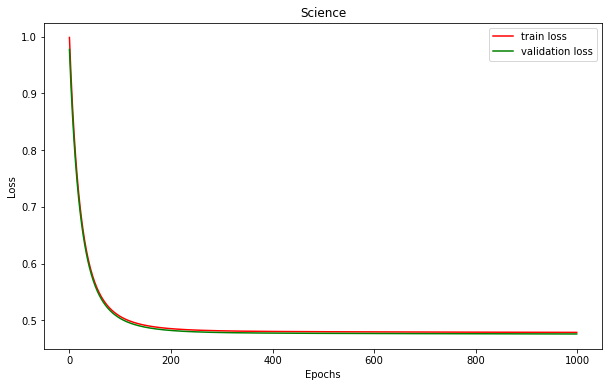

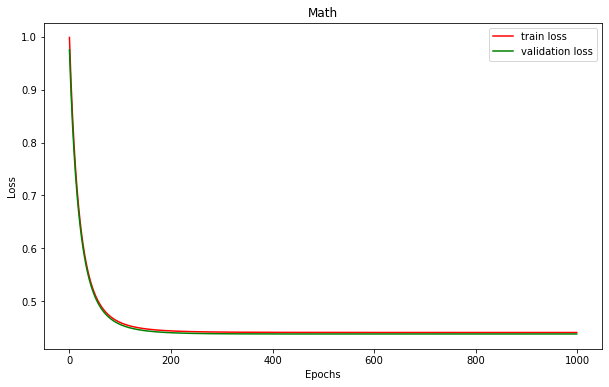

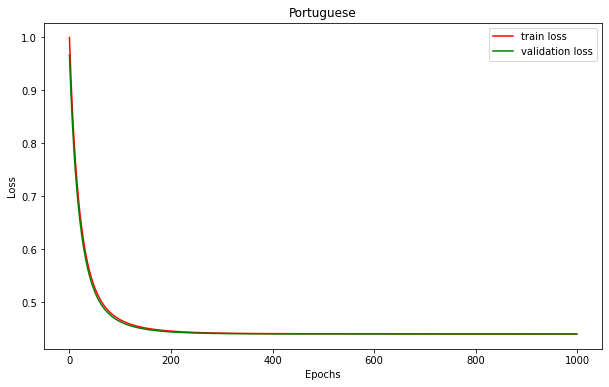

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

def plot_cost_function(train_loss, val_loss, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='train loss', color='red')
    plt.plot(val_loss, label='validation loss', color='green')
    plt.legend()
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()


val_loss_cie
plot_cost_function(train_loss_cie, val_loss_cie, 'Science')
plot_cost_function(train_loss_mat, val_loss_mat, 'Math')
plot_cost_function(train_loss_lp, val_loss_lp, 'Portuguese')


> What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

*Analysing the graphs, we could see that all models are converging in similar rates. The curve shows that for more epochs iterations, the loss value reaches a minimum value, creating a plateau, showing the convergence.*

5. (0.25 point) Pick **your best model**, based on your validation set, and predict the target values for the test set.

In [ ]:
print(model_cie_sgd.score(X_test_cie, y_test_cie))
print(model_mat_sgd.score(X_test_mat, y_test_mat))
print(model_lp_sgd.score(X_test_lp, y_test_lp))

0.5599071299985512
0.5761083020639262
0.6128992720715376


## Logistic Regression

First, let remove the columns used as target in the Linear regression

In [233]:
def tranform_into_log_reg(df):
    df = df.drop(columns=['porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE'], axis=1)
    return df
df_log = tranform_into_log_reg(df)
df_log_teste = tranform_into_log_reg(df_teste)
type(df) 

pandas.core.frame.DataFrame

In [234]:
df_log.drop(columns=['CD_ALUNO'], axis=1, inplace=True)
df_log_teste.drop(columns=['CD_ALUNO'], axis=1, inplace=True)


We created a function to drop less correlation columns with target columns:

In [235]:
#correlation 

def drop_less_correlation(df, target, limit_value):

  corr_df = df
  corr_df = corr_df.corrwith(corr_df[target]).abs().sort_values()
  adj_df = df
  adj_df = adj_df.drop(columns=[row for row in corr_df.index if corr_df[row] < limit_value], axis=1)
  return adj_df

df_log_cie = drop_less_correlation(df_log, 'nivel_profic_cie', 0.0) #set the minimum correlation value here
df_log_mat = drop_less_correlation(df_log, 'nivel_profic_mat', 0.0)
df_log_lp = drop_less_correlation(df_log, 'nivel_profic_lp', 0.0)

Splitting the data:

In [236]:
from sklearn.model_selection import train_test_split
def split_data(df, target, validation_size):
    X = df.drop(columns=[target, 'nivel_profic_lp'])
    y = df[target]
    return train_test_split(X, y, test_size=validation_size, random_state=42)
X_train_cie, X_val_cie, y_train_cie, y_val_cie = split_data(df_log_cie, 'nivel_profic_cie', 0.2)
X_train_mat, X_val_mat, y_train_mat, y_val_mat = split_data(df_log_mat, 'nivel_profic_mat', 0.2)
#X_train_lp, X_val_lp, y_train_lp, y_val_lp = split_data(df_log_lp, 'nivel_profic_lp', 0.2)
y_test_cie_log = df_log_teste['nivel_profic_cie']
y_test_mat_log = df_log_teste['nivel_profic_mat']
#y_test_lp_log = df_log_teste['nivel_profic_lp']
X_teste_log_cie = df_log_teste.drop(columns=['nivel_profic_cie'])
X_teste_log_mat = df_log_teste.drop(columns=['nivel_profic_mat'])

Normalizing it:

In [237]:
def normalize_data(df):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    scaler = StandardScaler()
    scaler.fit(df)
    return scaler.transform(df)
X_train_cie = normalize_data(X_train_cie)
X_val_cie = normalize_data(X_val_cie)
X_train_mat = normalize_data(X_train_mat)
X_val_mat = normalize_data(X_val_mat)
X_train_lp = normalize_data(X_train_lp)
X_val_lp = normalize_data(X_val_lp)
X_teste_log_cie = normalize_data(X_teste_log_cie)
X_teste_log_mat = normalize_data(X_teste_log_mat)


Now, this part of the assignment aims to predict students' proeficiency level on Portuguese, Mathematics, and Natural Sciences (target values: `nivel_profic_lp`, `nivel_profic_mat` and `nivel_profic_cie`) based on their socioeconomic data. Then, you have to **drop the columns `porc_ACERT_lp`,  `porc_ACERT_MAT`** and  **`porc_ACERT_CIE`**.

### Activities

1. (2.75 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. Try different combinations of features, dropping the ones less correlated to the target variables.

In [238]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.
from sklearn.linear_model import LogisticRegression
def multinomial_logistic_regression(X_train, y_train, X_val, y_val, num_epochs = 1000):
    model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter= num_epochs, n_jobs=-1, verbose = 10)
    model.fit(X_train, y_train)
    return model
#print("Science")
model_cie = multinomial_logistic_regression(X_train_cie, y_train_cie, X_val_cie, y_val_cie)
print("Accuracy: ", model_cie.score(X_val_cie, y_val_cie))
#print("Math")
model_mat = multinomial_logistic_regression(X_train_mat, y_train_mat, X_val_mat, y_val_mat)
print("Accuracy: ", model_mat.score(X_val_mat, y_val_mat))
#print("Portuguese")
model_lp = multinomial_logistic_regression(X_train_lp, y_train_lp, X_val_lp, y_val_lp)
print("Accuracy: ", model_lp.score(X_val_lp, y_val_lp))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 29 epochs took 8 seconds
Accuracy:  0.5902795056813469


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 32 epochs took 9 seconds
Accuracy:  0.6366011445633242


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 32 epochs took 8 seconds
Accuracy:  0.6166956954466285


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.9s finished


> What are the conclusions? (1-2 paragraphs)


*After the training, we can see that the logistic regression returned better predictions to students proeficiency*

2. (0.5 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True


In [ ]:
"""Function to capture the output of a cell in a notebook"""
def capture_output(cell):
    lista = []
    stdout = sys.stdout
    sys.stdout = io.StringIO()
    cell()
    sys.stdout.seek(0)
    lista.append(sys.stdout.seek(0))
    output = sys.stdout.read()
    lista.append(output)
    sys.stdout = stdout
    return lista
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter= 100, verbose=1)
capture_output(lambda: model.fit(X_train_cie, y_train_cie))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s finished


[0, 'convergence after 31 epochs took 7 seconds\n']

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter= 100, verbose=1)
model.fit(X_train_cie, y_train_cie)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 31 epochs took 7 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s finished


LogisticRegression(multi_class='multinomial', solver='sag', verbose=1)

In [ ]:
with open('output.txt', 'w') as f:
    f.write(cap.stdout)

NameError: ignored

> What are the conclusions? (1-2 paragraphs)


3. (0.75 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


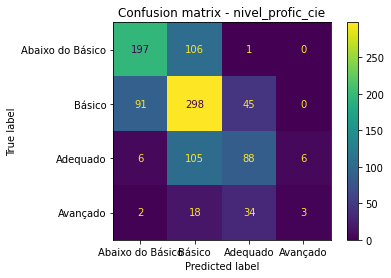

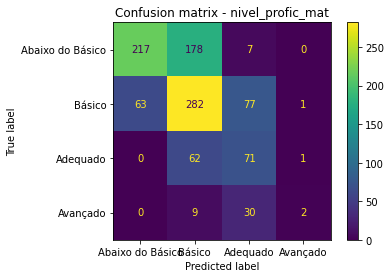

In [261]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_pred_cie = model_cie.predict(X_teste_log_cie)
confusion_matrix_cie = confusion_matrix(y_test_cie_log, y_pred_cie)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_cie, display_labels = ['Abaixo do Básico', 'Básico', 'Adequado', 'Avançado'])
cm_display.plot()
cm_display.ax_.set_title('Confusion matrix - nivel_profic_cie')
plt.show()

y_pred_mat = model_cie.predict(X_teste_log_mat)
confusion_matrix_mat = confusion_matrix(y_test_mat_log, y_pred_mat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mat, display_labels = ['Abaixo do Básico', 'Básico', 'Adequado', 'Avançado'])
cm_display.plot()
cm_display.ax_.set_title('Confusion matrix - nivel_profic_mat')
plt.show()









> What are the conclusions? (1-2 paragraphs)


## Deadline

Monday, September 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- September 20, 11:59 pm : grade * 0.75
- September 21, 11:59 pm : grade * 0.5
- September 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**